In [204]:
import tensorflow as tf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### Load Dataset

In [205]:
columns=['mpg','cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 
         'car name']  #The Column names as given in the UCL Machine Learning Repo

df=pd.read_csv(r"C:\Users\Soumyajit Sarkar\Desktop\Tensorflow\Auto-mpg\Dataset\auto-mpg.data-original.csv",
               sep='\s+',names=columns)  # Reading the Dataset and storing it in a dataframe called 'df'

print(df.shape)  #Gives the shape of the dataset i.e rows x columns

df.head()

(406, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


#### Pre-Process the Dataset

##### 1. Missing value replacement

In [206]:
df.isnull().sum()  # The total number of null or missing values collumn wise

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [207]:
df.dropna(subset=['mpg'], axis=0, inplace=True)  #replace the missing values by mean for mpg column
df['horsepower']=df['horsepower'].replace(np.nan,df['horsepower'].mean())  # By mean again for horsepower column

##### 2. Changing Country of Origin to Categorical Data

In [208]:
df=pd.concat([df,pd.get_dummies(df['origin'])],axis=1)  # This adds three more rows corresponding to each 
                                                        # unique value in origins collumns
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,1.0,2.0,3.0
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,1,0,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,1,0,0


In [288]:
"""
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Changing The names of the columns :
    
    1: USA
    2: Europe
    3: Japan
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
"""
df_changed=df.drop(['origin'],axis=1)
df_changed=df_changed.drop(['car name'],axis=1)
df_changed=df_changed.rename(columns={1:'USA',2:'Europe',3:'Japan'})
df_changed.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1,0,0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1,0,0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1,0,0


#### 3. Data Prepation for Model (Target = mpg)

In [210]:
train_stat = df_changed.describe()
train_stat.pop('mpg')
train_stat = train_stat.transpose()
train_stat

,count,mean,std,min,25%,50%,75%,max
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.469388,38.199187,46.0,76.000,95.0,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
USA,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
Europe,398.0,0.175879,0.381197,0.0,0.000,0.0,0.000,1.0
Japan,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0


In [211]:
train_dataset = df_changed.sample(frac = 0.8, random_state =0)
test_dataset = df_changed.drop(train_dataset.index)

In [212]:
def norm(x):
    return ((x - train_stat['mean'])/train_stat['std'])
target = train_dataset.pop('mpg')
test_target = test_dataset.pop('mpg')
train_dataset = norm(train_dataset)
test_dataset = norm(test_dataset)
train_dataset.shape

(318, 9)

#####  Data Prep. for Model ( Y=Mpg)

In [213]:
"""
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Preparing the input for the model :

x : all the columns in df exclusing 
    'mpg', 'car name', 'origin'
    
y : 'mpg'

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
"""


"""train_dataset = tf.data.Dataset.from_tensor_slices((df_changed.values,target.values))

rows, columns=x_train.shape

batch_size = 32

train_dataset = train_dataset.shuffle(len(df_changed)).batch(1)"""

'train_dataset = tf.data.Dataset.from_tensor_slices((df_changed.values,target.values))\n\nrows, columns=x_train.shape\n\nbatch_size = 32\n\ntrain_dataset = train_dataset.shuffle(len(df_changed)).batch(1)'

#### 4.Model Design 

In [295]:
"""
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Model Input : 9 features per data

1. A Dense Layer with 18 neurons
    Activation : ReLU

2. A Dense Layer with 40 neurons
    Activation : ReLU

3. A Dense Layer with 10 neurons
    Activation : ReLU

4. A Dense Layer with 1 neuron as output

loss : mean squared error 
optimizer : Adam optimizer with 0.1 Learning rate
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
"""
model=tf.keras.Sequential([tf.keras.layers.Dense(units=40, activation=tf.nn.relu , input_shape=[9]),
                           tf.keras.layers.Dense(units=30, activation=tf.nn.relu),
                           tf.keras.layers.Dense(units=15, activation=tf.nn.relu),
                           tf.keras.layers.Dense(units=1)])

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['mse'])
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_128 (Dense)            (None, 40)                400       
_________________________________________________________________
dense_129 (Dense)            (None, 30)                1230      
_________________________________________________________________
dense_130 (Dense)            (None, 15)                465       
_________________________________________________________________
dense_131 (Dense)            (None, 1)                 16        
Total params: 2,111
Trainable params: 2,111
Non-trainable params: 0
_________________________________________________________________


#### 5.Model Training : 

In [296]:
"""
~~~~~~~~~~~~~~~
Epochs = 1000
~~~~~~~~~~~~~~~
"""
stop_criteria = tf.keras.callbacks.EarlyStopping (monitor='val_loss',patience = 10)

import math
loss = model.fit(train_dataset,target, epochs=1000, validation_split = 0.2, verbose = False, callbacks=[stop_criteria])

In [297]:
loss = pd.DataFrame(loss.history)
loss['epoch']=model.history.epoch
loss.tail()

,loss,mse,val_loss,val_mse,epoch
80,6.250878,6.250878,5.583918,5.583918,80
81,6.307193,6.307193,5.615724,5.615724,81
82,6.376814,6.376814,5.708737,5.708737,82
83,6.097087,6.097087,5.646645,5.646645,83
84,6.296800,6.296801,5.970721,5.970721,84


In [298]:
l=pd.DataFrame(model.history.history)
l.head()

,loss,mse,val_loss,val_mse
0,570.044696,570.044739,550.763000,550.763000
1,526.559162,526.559204,506.843353,506.843353
2,478.290465,478.290436,455.680786,455.680786
3,422.062028,422.062012,397.476227,397.476227
4,358.302062,358.302063,331.775467,331.775452


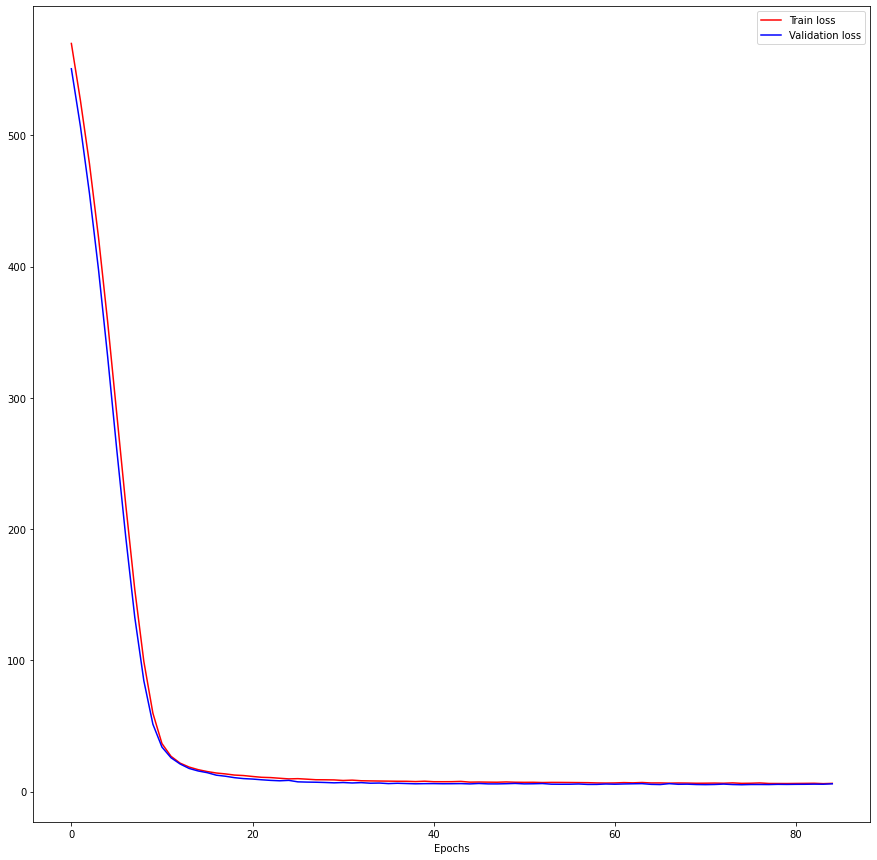

In [299]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
plt.plot(loss['epoch'],loss['loss'],color='red',label='Train loss')
plt.plot(loss['epoch'],loss['val_loss'],color='blue',label='Validation loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()